Question 3

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 


(-0.5, 539.5, 359.5, -0.5)

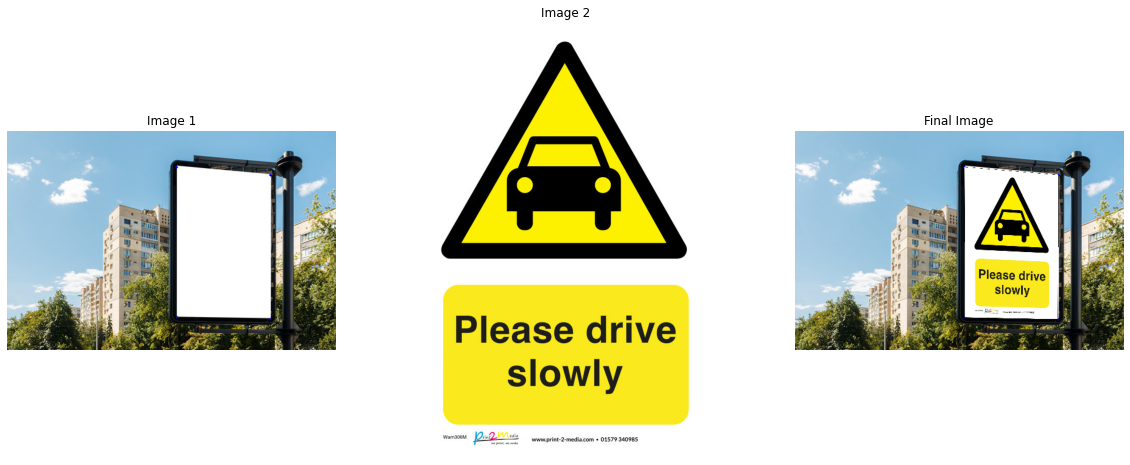

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

pos=[]
pos2=[]
count=0

def points(event,x_cord,y_cord,flags,param):
    global pos,count 
    
    if event==cv.EVENT_LBUTTONUP:
        cv.circle(img1,(x_cord,y_cord),2,(255,0,0),-1)
        pos.append([x_cord,y_cord])
        if(count!=3):
            pos2.append([x_cord,y_cord])
        elif(count==3):
            pos2.insert(2,[x_cord,y_cord])
        count+=1
img1=cv.imread("./banner.jpg")
img2=cv.imread("./warning.jpg")

cv.namedWindow("window")
cv.setMouseCallback('window',points)

while(1):
    cv.imshow("window",img1)
    k=cv.waitKey(20) & 0xFF
    if k==27:
        break
    
cv.destroyAllWindows()
h1,w1=img2.shape[:2]

point1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
point2=np.float32(pos)

h,mask=cv.findHomography(point1,point2,cv.RANSAC,5.0)

height, width, channels = img1.shape

img_reg=cv.warpPerspective(img2,h,(width,height))

mask1 = np.zeros(img1.shape, dtype=np.uint8)

corners= np.int32(pos2)


mask_color2 = (255,)*channels

cv.fillConvexPoly(mask1, corners, mask_color2)

mask1 = cv.bitwise_not(mask1)
masked_image2 = cv.bitwise_and(img1, mask1)

#Using Bitwise or to merge the two images
final = cv.bitwise_or(img_reg, masked_image2)

final=cv.cvtColor(final,cv.COLOR_BGR2RGB)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(final)

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Final Image")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")


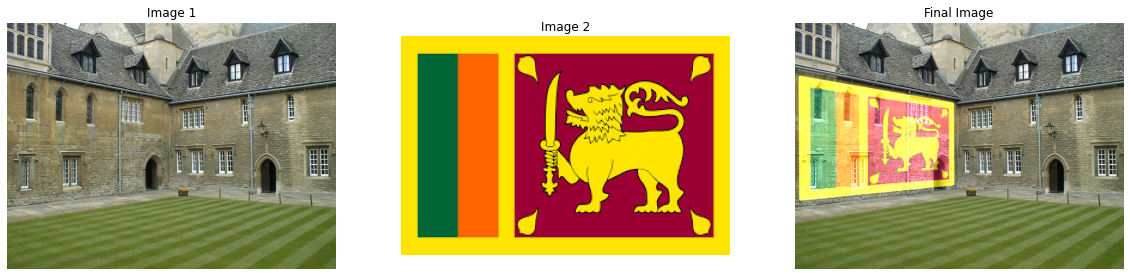

In [6]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

pos = []
pos2 = []
count = 0

def points(event, x_cord, y_cord, flags, param):
    global pos, count

    if event == cv.EVENT_LBUTTONUP:
        cv.circle(img1, (x_cord, y_cord), 2, (255, 0, 0), -1)
        pos.append([x_cord, y_cord])
        if (count != 3):
            pos2.append([x_cord, y_cord])
        elif (count == 3):
            pos2.insert(2, [x_cord, y_cord])
        count += 1

img1 = cv.imread("./wall.jpeg")
img2 = cv.imread("./download.png")

cv.namedWindow("window")
cv.setMouseCallback('window', points)

while (1):
    cv.imshow("window", img1)
    k = cv.waitKey(20) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()
h1, w1 = img2.shape[:2]

point1 = np.float32([[0, 0], [w1, 0], [0, h1], [w1, h1]])
point2 = np.float32(pos)

h, mask = cv.findHomography(point1, point2, cv.RANSAC, 5.0)

height, width, channels = img1.shape

img_reg = cv.warpPerspective(img2, h, (width, height))


alpha_mask = np.ones(img_reg.shape[:2], dtype=np.float32)
alpha = 0.7  

alpha_mask[alpha_mask == 1] = alpha

blended = cv.addWeighted(img1, 1.0, img_reg, alpha, 0)

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(blended, cv.COLOR_BGR2RGB))

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Final Image")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
plt.show()
